# Normal Mode Experiment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def max_of_range(x_array_all, y_array_all, start_index, stop_index):
    x_array = x_array_all[start_index:stop_index]
    y_array = y_array_all[start_index:stop_index]
    for i in range(len(y_array)):
        if y_array[i] == y_array.max():
            return x_array[i], y_array[i]

In [3]:
df1 = pd.read_table('ip4_empty.txt')
df2 = pd.read_table('ip4_abs_21.txt')
df3 = pd.read_table('ip4_abs_10.txt')
df4 = pd.read_table('ip4_sqr3ok.txt')

t1, u1 = df1['t'].to_numpy(), df1['U'].to_numpy()
t2, u2 = df2['t'].to_numpy(), df2['U'].to_numpy()
t3, u3 = df3['t'].to_numpy(), df3['U'].to_numpy()
t4, u4 = df4['t'].to_numpy(), df4['U'].to_numpy()

v1 = np.array([i+250 for i in t1])
v2 = np.array([i+250 for i in t2])
v3 = np.array([i+250 for i in t3])
v4 = np.array([i+50 for i in t4])
# display('empty', df1, '21 cm', df2, '10 cm', df3, 'square wave', df4)

## Empty

In [4]:
all_max1 = np.array(
[max_of_range(v1,u1,0,100),max_of_range(v1,u1,100,220),max_of_range(v1,u1,220,300),
 max_of_range(v1,u1,300,400),max_of_range(v1,u1,400,500),max_of_range(v1,u1,500,550),
 max_of_range(v1,u1,550,575),max_of_range(v1,u1,575,585),
 max_of_range(v1,u1,585,625),max_of_range(v1,u1,625,640),max_of_range(v1,u1,640,690),
 max_of_range(v1,u1,690,706),max_of_range(v1,u1,706,725),
 max_of_range(v1,u1,725,770),max_of_range(v1,u1,770,830),max_of_range(v1,u1,830,885),])
nu0 = all_max1.T[0]

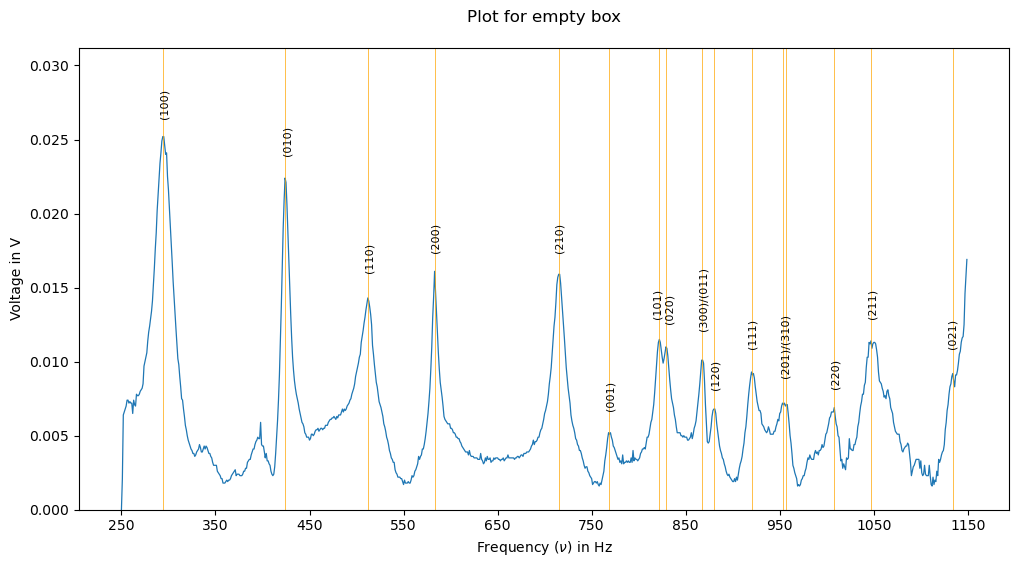

In [5]:
vmax1tick = np.array([291,421,509,579,711,765,815,827,864,876,916,951,1004,1043,1128])
umax1tick = np.array([0.0255,0.023,0.0151,0.0165,0.0165,0.0058,0.012,
                      0.0117,0.0112,0.0072,0.01,0.008,0.0073,0.012,0.01])
umax1tick = umax1tick + np.full_like(umax1tick, 0.001)
nxyz1 = np.array(['(100)','(010)','(110)','(200)','(210)','(001)','(101)','(020)','(300)/(011)',
                  '(120)','(111)','(201)/(310)','(220)','(211)','(021)'])
plt.figure(figsize=(12, 6))
plt.plot(v1, u1, lw=0.9)
plt.title('Plot for empty box\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
for i in range(len(nu0)):
    plt.axvline(nu0[i],color='orange', lw=0.5,)
for i in range(len(vmax1tick)):
    plt.text(vmax1tick[i],umax1tick[i],nxyz1[i],size=8,rotation='vertical')
plt.ylabel('Voltage in V')
plt.xticks(np.arange(250, 1200, 100))
plt.ylim(0, u1.max()+0.006)
# plt.grid()
plt.savefig('fig_empty', dpi=200)
plt.show()

In [6]:

df1table = pd.DataFrame({
'nx, ny, nz': ['100','010','110','200','210','001','101','020','300/011','120','111','201','310','220','211','021'], 
'Frequency':nu0
})
display(df1table)

,"nx, ny, nz",Frequency
0,100,294.0
1,010,424.0
2,110,512.0
3,200,583.0
4,210,715.0
5,001,768.0
6,101,822.0
7,020,829.0
8,300/011,867.0
9,120,880.0


### Expected value calculator

In [7]:
nx = 1
ny = 0
nz = 0
y, x, z = 42.4, 60.4, 22.8
c = 34.78e3
nu = (c/2)*((nx/x)**2 + (ny/y)**2 + (nz/z)**2)**0.5
print(nu)

287.91390728476824


### Q-factor for first prominent peak

v0=294.6969696969697, u0=0.025111056864261627, u_rms=0.017756198591480397, v01=286.030303030303, v02=302.969696969697,
 dv0=16.939393939393995, Q=17.3971377459749


c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3457: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


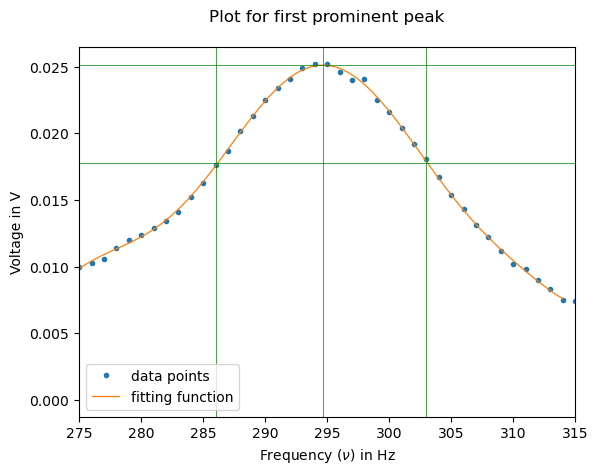

In [8]:
from numpy import polyfit
v1p, u1p = v1[25:65], u1[25:65]
cs = polyfit(v1p, u1p, 9)
v1x = np.linspace(v1p.min(), v1p.max(), 100)
u1x = sum([cs[i]*v1x**(len(cs)-1-i) for i in range(len(cs))])
plt.plot(v1, u1, 'o', ms=3, label='data points')
plt.plot(v1x, u1x, lw=0.9, label='fitting function')
v0, u0 = max_of_range(v1x,u1x,10,90)
urms = u0/2**0.5
u012 = u1x.max() - abs(u1x-np.full_like(u1x, urms))
v01 = max_of_range(v1x,u012,10,50)[0]
v02 = max_of_range(v1x,u012,50,90)[0]
dv0 = abs(v01-v02)
Q = v0/dv0
plt.axvline(v0, color='green', lw=0.5)
plt.axhline(u0, color='green', lw=0.5)
plt.axhline(urms, color='green', lw=0.5)
plt.axvline(v01, color='green', lw=0.5)
plt.axvline(v02, color='green', lw=0.5)
plt.xlim(275,315)
print(f'v0={v0}, u0={u0}, u_rms={urms}, v01={v01}, v02={v02},\n dv0={dv0}, Q={Q}')

plt.title('Plot for first prominent peak\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
plt.ylabel('Voltage in V')
plt.legend()

plt.savefig('fig_peak1', dpi=200)
plt.show()

## Partition at 21 cm distance

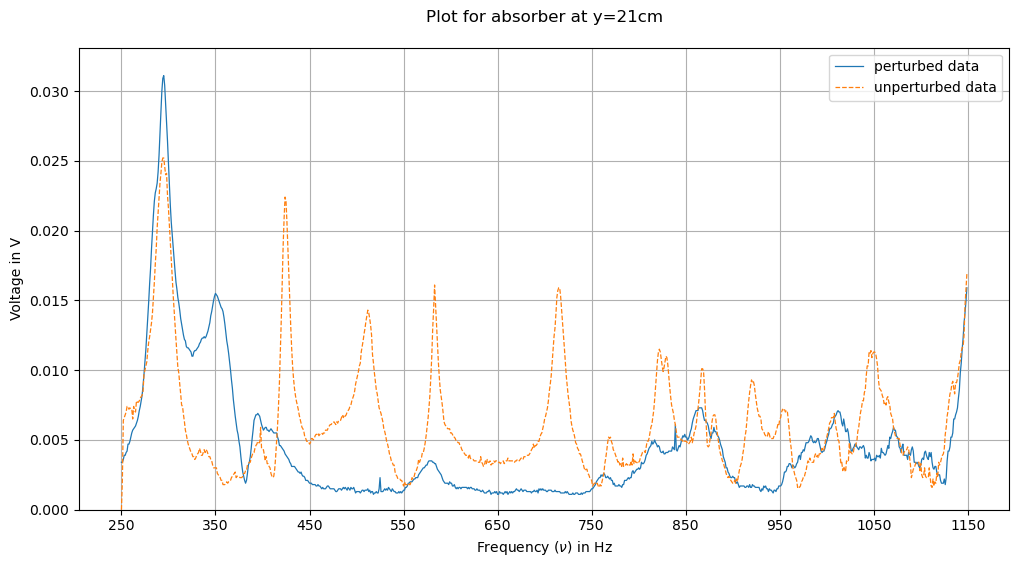

In [9]:
plt.figure(figsize=(12, 6))
plt.plot(v2, u2, lw=0.9, label='perturbed data')
plt.plot(v1, u1, '--', lw=0.9, label='unperturbed data')
plt.title('Plot for absorber at y=21cm\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
plt.ylabel('Voltage in V')
plt.xticks(np.arange(250, 1200, 100))
plt.ylim(0, max(u2.max(), u1.max())+0.002)
plt.legend()
plt.grid()
plt.savefig('fig_21cm', dpi=200)
plt.show()

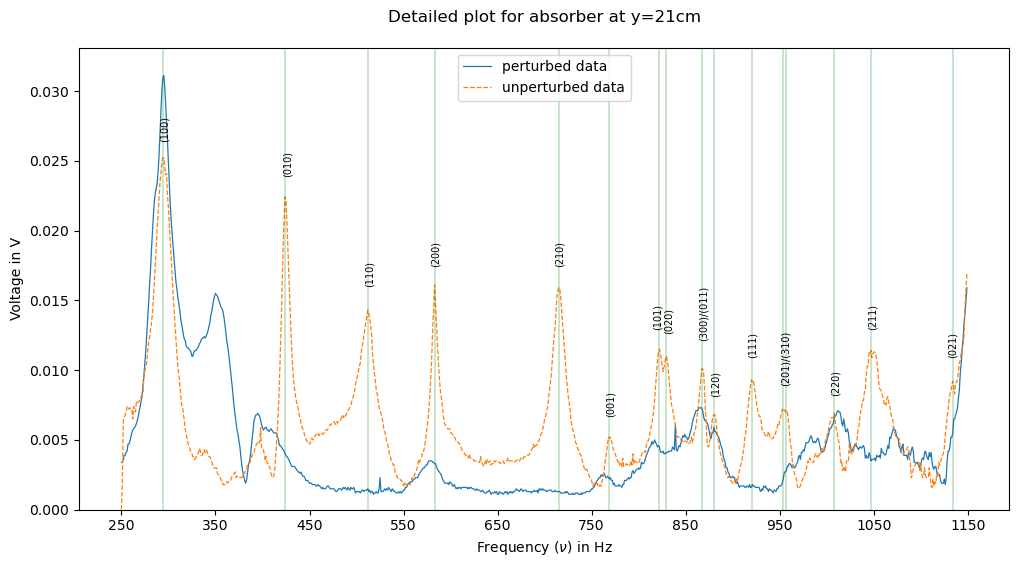

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(v2, u2, lw=0.9, label='perturbed data')
plt.plot(v1, u1, '--', lw=0.9, label='unperturbed data')
plt.title('Detailed plot for absorber at y=21cm\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
for i in range(len(nu0)):
    plt.axvline(nu0[i],color='green', lw=0.3,)
for i in range(len(vmax1tick)):
    plt.text(vmax1tick[i],umax1tick[i],nxyz1[i],size=7,rotation='vertical')
plt.ylabel('Voltage in V')
plt.xticks(np.arange(250, 1200, 100))
plt.ylim(0, max(u2.max(), u1.max())+0.002)
plt.legend()
# plt.grid()
plt.savefig('fig_21cm1', dpi=200)
plt.show()

## Partition at 10 cm distance

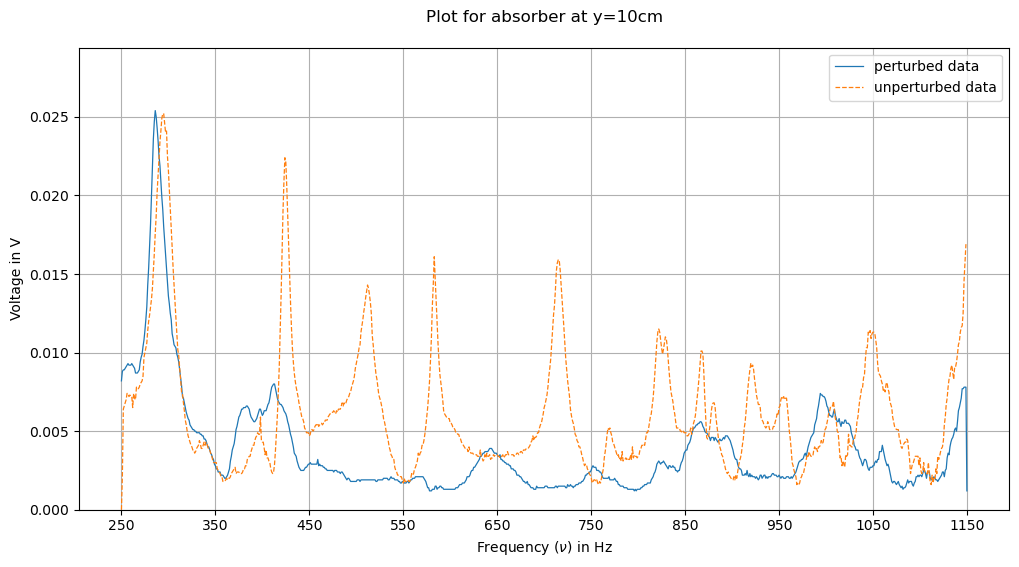

In [11]:
plt.figure(figsize=(12, 6))
plt.plot(v3, u3, lw=0.9, label='perturbed data')
plt.plot(v1, u1, '--', lw=0.9, label='unperturbed data')
plt.title('Plot for absorber at y=10cm\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
plt.ylabel('Voltage in V')
plt.xticks(np.arange(250, 1200, 100))
plt.ylim(0, max(u3.max(), u1.max())+0.004)
plt.legend()
plt.grid()
plt.savefig('fig_10cm', dpi=200)
plt.show()

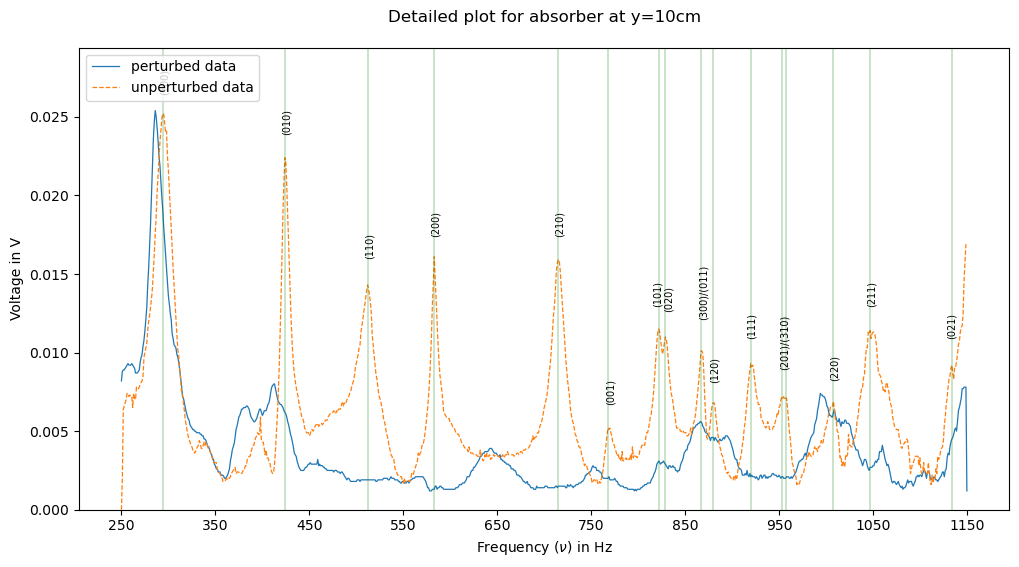

In [12]:
plt.figure(figsize=(12, 6))
plt.plot(v3, u3, lw=0.9, label='perturbed data')
plt.plot(v1, u1, '--', lw=0.9, label='unperturbed data')
plt.title('Detailed plot for absorber at y=10cm\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
for i in range(len(nu0)):
    plt.axvline(nu0[i],color='green', lw=0.3,)
for i in range(len(vmax1tick)):
    plt.text(vmax1tick[i],umax1tick[i],nxyz1[i],size=7,rotation='vertical')
plt.ylabel('Voltage in V')
plt.xticks(np.arange(250, 1200, 100))
plt.ylim(0, max(u3.max(), u1.max())+0.004)
plt.legend()
# plt.grid()
plt.savefig('fig_10cm1', dpi=200)
plt.show()

## Using Square Wave

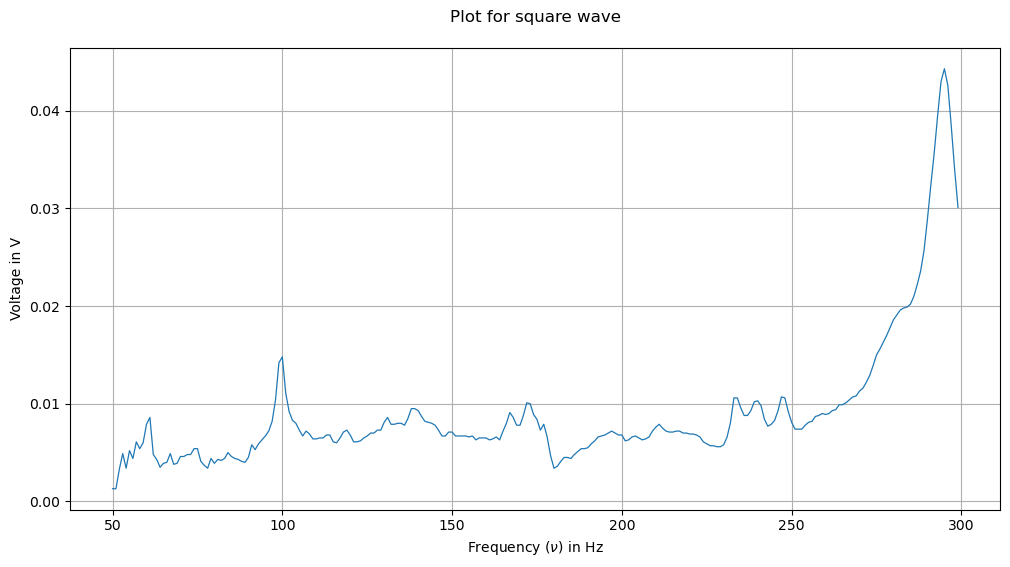

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(v4, u4, lw=0.9)
plt.title('Plot for square wave\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
plt.ylabel('Voltage in V')
plt.grid()
plt.savefig('fig_sq', dpi=200)
plt.show()

In [14]:
sqmax = np.array([max_of_range(v4,u4,0,25), max_of_range(v4,u4,25,75), max_of_range(v4,u4,75,100),
max_of_range(v4,u4,100,150), max_of_range(v4,u4,150,190),
max_of_range(v4,u4,190,250)])   # peaks
vsqs = sqmax.T[0]
vsqs

array([ 61., 100., 138., 172., 233., 295.])

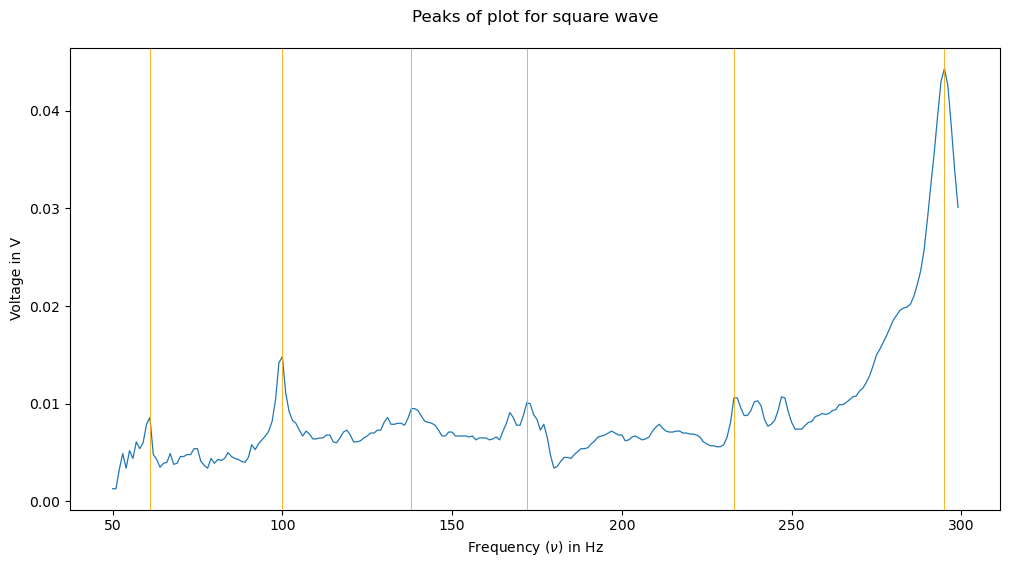

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(v4, u4, lw=0.9)
plt.title('Peaks of plot for square wave\n')
plt.xlabel('Frequency ($\\nu$) in Hz')
for i in range(len(vsqs)):
    plt.axvline(vsqs[i],color='orange', lw=0.6)
plt.ylabel('Voltage in V')
plt.savefig('fig_sq1', dpi=200)
plt.show()